**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/machine-learning-competitions).**

---


In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# # Set up filepaths
# import os
# if not os.path.exists("../input/train.csv"): 
#     os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
#     os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
    
print("Setup Complete")

Setup Complete


In [2]:
import os
import pandas as pd

# Path to the States folder
folder_path = "../input/states2/States"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Iterate over each file in the folder
for i, file_name in enumerate(file_list):
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Read the file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Skip the first line for all files except the first one
    if i > 0:
        data = data.iloc[1:]
    
    # Append the data to the merged_data DataFrame
    merged_data = pd.concat([merged_data, data], ignore_index=True)

# Save the merged data to a CSV file
merged_data.to_csv("merged_data.csv", index=False)

merged_data.head()


,zpid,rawHomeStatusCd,marketingStatusSimplifiedCd,imgSrc,hasImage,detailUrl,statusType,statusText,price,priceLabel,...,flexFieldType,communityName,hdpData.homeInfo.providerListingID,plid,isCdpResult,isComingSoonCommunity,style,isNewYorkState,buildingName,brokerPhone
0,2243875.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/26204030eef...,True,/homedetails/2878-Meadow-Brook-Dr-Woodbury-MN-...,FOR_SALE,House for sale,"$500,000",$500K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1884963.0,ComingSoon,Coming Soon,https://photos.zillowstatic.com/fp/12ef130c86b...,True,/homedetails/5421-Cumberland-Rd-Minneapolis-MN...,FOR_SALE,Coming soon,"$579,900",$580K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2255276.0,ComingSoon,Coming Soon,https://maps.googleapis.com/maps/api/staticmap...,NaN,/homedetails/205-Juniper-St-Saint-Paul-MN-5511...,FOR_SALE,Coming soon,"$579,900",$580K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1602734.0,ComingSoon,Coming Soon,https://photos.zillowstatic.com/fp/ea83348d84e...,True,/homedetails/1112-Emerson-Ct-Burnsville-MN-553...,FOR_SALE,Coming soon,"$500,000",$500K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1963150.0,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/2d256b4bae8...,True,/homedetails/6432-Knoll-St-Golden-Valley-MN-55...,FOR_SALE,House for sale,"$325,000",$325K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# # Get the column headers
# column_headers = merged_data.columns.tolist()

# # Print the column headers
# print(column_headers)

In [4]:
merged_data.to_csv('submission.csv', index=False)

In [5]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target



# iowa_file_path = '../input/home-data-for-ml-course/train.csv'
# home_data = pd.read_csv(iowa_file_path)

# tampa_file_path = '../input/new-tampa-set/train-2.csv'
home_data = merged_data
home_data = home_data.replace({'\$': ''}, regex=True)
home_data = home_data.replace({',': ''}, regex=True)





home_data['price'] = home_data['price'].str.extract(r'(\d+)')

# Convert the column to integer
home_data['price'] = home_data['price'].astype(int)


features = ['price', 'beds', 'baths', 'area', 'timeOnZillow', 'hdpData.homeInfo.livingArea','latLong.latitude', 'latLong.longitude','hdpData.homeInfo.zestimate', 'hdpData.homeInfo.taxAssessedValue']



home_data = home_data[features]
home_data = home_data.dropna()


y = home_data.price


# Create X (After completing the exercise, you can return to modify this line!)

features = ['beds', 'baths', 'area', 'timeOnZillow', 'hdpData.homeInfo.livingArea', 'latLong.latitude', 'latLong.longitude', 'hdpData.homeInfo.zestimate', 'hdpData.homeInfo.taxAssessedValue']

# Select columns corresponding to features, and preview the data
X = home_data[features]



X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
# rf_model = RandomForestRegressor(random_state=1)
# rf_model.fit(train_X, train_y)
# rf_val_predictions = rf_model.predict(val_X)
# rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))
print("box ran")

box ran


In [6]:
train_y.describe()

count    3.894000e+03
mean     6.108025e+05
std      1.291655e+06
min      1.000000e+00
25%      2.790000e+05
50%      3.999000e+05
75%      6.000000e+05
max      2.550000e+07
Name: price, dtype: float64

In [7]:
import numpy as np

# Check for NaNs in input data
if isinstance(train_X, (pd.Series, pd.DataFrame)):
    print(train_X.isna().sum())
else:
    print(np.isnan(train_X).sum())

beds                                 0
baths                                0
area                                 0
timeOnZillow                         0
hdpData.homeInfo.livingArea          0
latLong.latitude                     0
latLong.longitude                    0
hdpData.homeInfo.zestimate           0
hdpData.homeInfo.taxAssessedValue    0
dtype: int64


In [8]:
if isinstance(train_y, (pd.Series, pd.DataFrame)):
    print(train_y.isna().sum())
else:
    print(np.isnan(train_y).sum())

0


In [9]:
train_X.describe()

,beds,baths,area,timeOnZillow,hdpData.homeInfo.livingArea,latLong.latitude,latLong.longitude,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue
count,3894.000000,3894.000000,3894.000000,3.894000e+03,3894.000000,3894.000000,3894.000000,3.894000e+03,3.894000e+03
mean,3.495378,2.571135,2252.661274,1.641199e+09,2252.661274,38.845750,-93.858890,6.077376e+05,3.902233e+05
std,1.063537,1.163248,1421.844983,3.421223e+09,1421.844983,5.326635,14.919457,1.211032e+06,6.940055e+05
min,0.000000,0.000000,0.000000,-2.868960e+08,0.000000,26.424732,-123.790504,3.380000e+04,8.750000e+02
25%,3.000000,2.000000,1476.000000,2.315040e+08,1476.000000,34.426070,-103.867131,2.764000e+05,1.669250e+05
50%,3.000000,2.000000,1943.500000,3.579905e+08,1943.500000,38.739465,-91.373015,4.031500e+05,2.824000e+05
75%,4.000000,3.000000,2634.750000,1.437174e+09,2634.750000,43.435074,-80.810061,6.191500e+05,4.370568e+05
max,22.000000,16.000000,25939.000000,3.353521e+10,25939.000000,48.962498,-70.641900,2.510930e+07,1.690020e+07


In [10]:
train_y.describe()

count    3.894000e+03
mean     6.108025e+05
std      1.291655e+06
min      1.000000e+00
25%      2.790000e+05
50%      3.999000e+05
75%      6.000000e+05
max      2.550000e+07
Name: price, dtype: float64

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, BatchNormalization

model = keras.Sequential([
    Input(shape = (9,)),
    layers.BatchNormalization(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.BatchNormalization(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dropout(rate = 0.15),
    layers.Dense(units = 1, activation = 'relu')
])

model.compile(
    optimizer = "adam",
    loss = "mae",
)

early_stopping = EarlyStopping(
    min_delta = 2000,
    patience = 20,
)

history = model.fit(
    train_X, train_y,
    validation_data = (val_X, val_y),
    batch_size = 1024, 
    epochs = 250,
    verbose = 1,
)



2024-06-02 18:29:02.694075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 18:29:02.694285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 18:29:02.882932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 590559.9375 - val_loss: 632311.8125
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 616516.0625 - val_loss: 632279.5000
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 589991.1875 - val_loss: 632223.1875
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 590035.7500 - val_loss: 632130.5000
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 604348.8125 - val_loss: 631985.9375
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 604340.9375 - val_loss: 631766.0000
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 599763.8750 - val_loss: 631439.3125
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 612515.3750 - val_loss: 630968.1250
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 604516.6875 - val_loss: 630305.8125
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 593725.2500 - val_loss: 629396.4375
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss:

<Axes: >

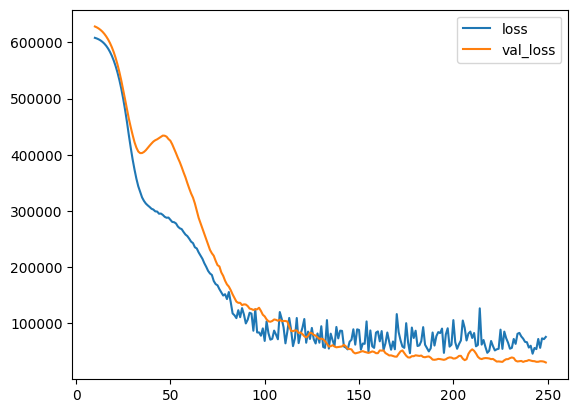

In [12]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()

# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [13]:
# # To improve accuracy, create a new Random Forest model which you will train on all training data
# rf_model_on_full_data = RandomForestRegressor(random_state = 1)

# # fit rf_model_on_full_data on all data from the training data
# rf_model_on_full_data.fit(X, y)

Now, read the file of "test" data, and apply your model to make predictions.

In [14]:
# path to file you will use for predictions
test_data_path = '../input/home-data-for-ml-course/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_predictions = model.predict(test_X)
test_preds = test_predictions.flatten()

print(test_preds)

KeyError: "None of [Index(['beds', 'baths', 'area', 'timeOnZillow', 'hdpData.homeInfo.livingArea',\n       'latLong.latitude', 'latLong.longitude', 'hdpData.homeInfo.zestimate',\n       'hdpData.homeInfo.taxAssessedValue'],\n      dtype='object')] are in the [columns]"

Before submitting, run a check to make sure your `test_preds` have the right format.

In [ ]:
# Check your answer (To get credit for completing the exercise, you must get a "Correct" result!)
step_1.check()
# step_1.solution()

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [ ]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)